In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter
import ROOT


%matplotlib inline
dataDir = "../data/eventFeatures"

Welcome to JupyROOT 6.16/00


In [2]:
run,backend, channel="198","ubcm",3
#run,backend, channel="231","VME",1

#run,backend, channel="222","ubcm",2
#run,backend, channel = "237","ubcm",0
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

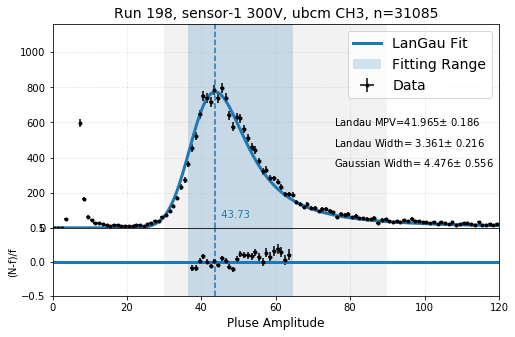

 FCN=269.186 FROM MIGRAD    STATUS=CONVERGED     596 CALLS         597 TOTAL
                     EDM=2.27806e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   3.36105e+00   2.15685e-01   7.11344e-04   5.33846e-04
   2  LandauMPV    4.19646e+01   1.86358e-01   1.22967e-03   1.13351e-03
   3  Normalisation   4.19978e+03   5.16625e+02   4.05744e-01  -7.66139e-06
   4  GaussianSigma   4.47575e+00   5.55619e-01   4.81357e-04  -6.86940e-03
                               ERR DEF= 0.5


In [3]:
ch = rd.getChannel(channel)
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,1, 300,backend,channel,len(ch))
# fitting
fitter = PulseAmpFitter(ch.pulseAmp,binsize=1)
fitter.fitRange(30,90, None)
# plot
fitter.plot()
fitter.axes[0].set_title(title, fontsize=14)
plt.savefig("../plots/example_langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)

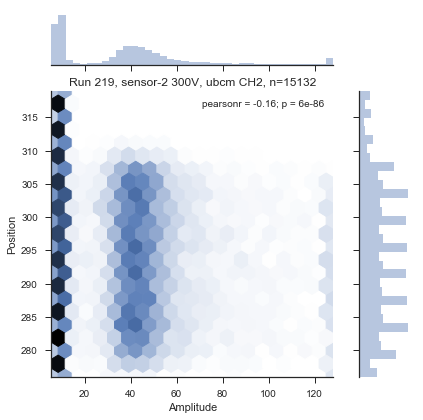

In [4]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp, ch.pulsePos, kind="hex", color="C0",gridsize=20,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
#plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)